# Importing libraries that we will use

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
#import pandas_datareader.data as reader

# Load the CSV file into a pandas DataFrame using the read_csv() function.
Importing data from csv that contain the Bitcoin data.

In [2]:
bitcoin = pd.read_csv('./Documents/UCD python for finance/project/data/Bitcoin - Bitcoin.csv')

In [3]:
print(bitcoin)

              Date       Open*        High         Low     Close**  \
0     feb 28, 2023  $23,521.84  $23,585.38  $23,077.65  $23,147.35   
1     feb 27, 2023  $23,561.45  $23,857.89  $23,205.88  $23,522.87   
2     feb 26, 2023  $23,174.15  $23,654.37  $23,084.22  $23,561.21   
3     feb 25, 2023  $23,200.13  $23,210.21  $22,861.56  $23,175.38   
4     feb 24, 2023  $23,946.01  $24,103.70  $23,007.07  $23,198.13   
...            ...         ...         ...         ...         ...   
3589  may 02, 2013     $116.38     $125.60      $92.28     $105.21   
3590  may 01, 2013     $139.00     $139.89     $107.72     $116.99   
3591  Apr 30, 2013     $144.00     $146.93     $134.05     $139.00   
3592  Apr 29, 2013     $134.44     $147.49     $134.00     $144.54   
3593  Apr 28, 2013     $135.30     $135.98     $132.10     $134.21   

               Volume        Market Cap  
0     $20,535,363,434  $446,846,764,116  
1     $22,660,763,494  $454,075,216,420  
2     $16,644,534,842  $454,795,1

For to be sure that the contents of the DataFrame reflect the meaning of my data, we need to clean and inspect the data.

### We will use the .head() method which displays the first 5 rows

In [4]:
print(bitcoin.head())

           Date       Open*        High         Low     Close**  \
0  feb 28, 2023  $23,521.84  $23,585.38  $23,077.65  $23,147.35   
1  feb 27, 2023  $23,561.45  $23,857.89  $23,205.88  $23,522.87   
2  feb 26, 2023  $23,174.15  $23,654.37  $23,084.22  $23,561.21   
3  feb 25, 2023  $23,200.13  $23,210.21  $22,861.56  $23,175.38   
4  feb 24, 2023  $23,946.01  $24,103.70  $23,007.07  $23,198.13   

            Volume        Market Cap  
0  $20,535,363,434  $446,846,764,116  
1  $22,660,763,494  $454,075,216,420  
2  $16,644,534,842  $454,795,165,823  
3  $16,100,721,565  $447,323,985,683  
4  $26,811,744,928  $447,747,058,644  


# Replace missing values

Some important questions to answer that will help to clean the data are:

Which data type would you expect pandas to assign to each column?
What symbol is used to represent a missing value?

Looking the data we will expect 6 columns type float64 and 1 column type datetime64.

We can see missing values from the first printing at the end of the data, we can print the last 5 rows to check, we will use .tail() function to display the last 5 rows.

In [5]:
print(bitcoin.tail())

              Date    Open*     High      Low  Close** Volume      Market Cap
3589  may 02, 2013  $116.38  $125.60   $92.28  $105.21     $0  $1,168,517,495
3590  may 01, 2013  $139.00  $139.89  $107.72  $116.99     $0  $1,298,954,594
3591  Apr 30, 2013  $144.00  $146.93  $134.05  $139.00     $0  $1,542,813,125
3592  Apr 29, 2013  $134.44  $147.49  $134.00  $144.54     $0  $1,603,768,865
3593  Apr 28, 2013  $135.30  $135.98  $132.10  $134.21     $0  $1,488,566,728


The DataFrame show some values in cero in the column 'volume' at the last rows, are represented with value '0', in case that we need it in future analysis we will extract the column and see until what date we have data. In this analysis we will need some of this data, closing prices since 2013, this is the reason we are not removing this rows. In other case, we can use the method of pandas dropna(), to remove missing values.

# Inspect the data
I will use the .info() to identify dtype mismatches in the DataFrame summary, see the content and the missing values.

In [6]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        3594 non-null   object
 1   Open*       3594 non-null   object
 2   High        3594 non-null   object
 3   Low         3594 non-null   object
 4   Close**     3594 non-null   object
 5   Volume      3594 non-null   object
 6   Market Cap  3594 non-null   object
dtypes: object(7)
memory usage: 196.7+ KB


This Dataframe has 3594 entries, in other words has 3594 rows and 7 columns 
as we can see the dtypes are all object, this is one thing that we need to change, then we will be able to work with the data as we want to manipulate numbers, that will help to get some results in our analysis. 

This DataFrame don't show any missing values, but we will use the na_values parameter to replace any missing values

We will use parse_dates parameter to turn things into real datetime types. parse_dates takes a list of columns, in case you want to parse multiple columns into datetimes.

In [7]:
bitcoin = pd.read_csv('./Documents/UCD python for finance/project/data/Bitcoin - Bitcoin.csv', na_values='n/a', parse_dates =['Date'])

In [8]:
print(bitcoin.head())

        Date       Open*        High         Low     Close**           Volume  \
0 2023-02-28  $23,521.84  $23,585.38  $23,077.65  $23,147.35  $20,535,363,434   
1 2023-02-27  $23,561.45  $23,857.89  $23,205.88  $23,522.87  $22,660,763,494   
2 2023-02-26  $23,174.15  $23,654.37  $23,084.22  $23,561.21  $16,644,534,842   
3 2023-02-25  $23,200.13  $23,210.21  $22,861.56  $23,175.38  $16,100,721,565   
4 2023-02-24  $23,946.01  $24,103.70  $23,007.07  $23,198.13  $26,811,744,928   

         Market Cap  
0  $446,846,764,116  
1  $454,075,216,420  
2  $454,795,165,823  
3  $447,323,985,683  
4  $447,747,058,644  


# Inspecting the data and changing dtypes.

In [9]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3594 non-null   datetime64[ns]
 1   Open*       3594 non-null   object        
 2   High        3594 non-null   object        
 3   Low         3594 non-null   object        
 4   Close**     3594 non-null   object        
 5   Volume      3594 non-null   object        
 6   Market Cap  3594 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 196.7+ KB


In [54]:
# Check for missing values
if bitcoin.isnull().values.any():
    print("The dataframe contains missing values.")
else:
    print("The dataframe does not contain any missing values.")

The dataframe does not contain any missing values.


We use the isnull() method to check for missing values in the dataframe. The values attribute returns a numpy array of boolean values indicating whether each element is missing or not

We use the any() method to check whether there is at least one missing value in the dataframe. If there are missing values, we print a message that the dataframe contains missing values. Otherwise, print that does not contain any missing values.

We can see that using this parameters, na_values and parse_dates, the column Date has changed to dtype like datetime64 and we are sure that we don't have any missing values

Change the other 6 columns dtypes to float

Convert multiple columns by passing a list of column names to the astype method.

bitcoin[['Open*', 'High','Low','Close**','Volume','Market Cap']] = bitcoin[['Open*', 'High','Low','Close**','Volume','Market Cap']].astype(float)

This wasn't working because there are non numeric symbols like '$' and ','.

# Removing the non-numeric characters from the colums

In [10]:
bitcoin['Open*'] = bitcoin['Open*'].str.replace('[^\d\.]', '', regex=True)

Checking if the non numeric characters are gone from the Open* column 

In [11]:
print(bitcoin.head())

        Date     Open*        High         Low     Close**           Volume  \
0 2023-02-28  23521.84  $23,585.38  $23,077.65  $23,147.35  $20,535,363,434   
1 2023-02-27  23561.45  $23,857.89  $23,205.88  $23,522.87  $22,660,763,494   
2 2023-02-26  23174.15  $23,654.37  $23,084.22  $23,561.21  $16,644,534,842   
3 2023-02-25  23200.13  $23,210.21  $22,861.56  $23,175.38  $16,100,721,565   
4 2023-02-24  23946.01  $24,103.70  $23,007.07  $23,198.13  $26,811,744,928   

         Market Cap  
0  $446,846,764,116  
1  $454,075,216,420  
2  $454,795,165,823  
3  $447,323,985,683  
4  $447,747,058,644  


We will remove the non-numerical characters of the rest of the columns

In [12]:
bitcoin['High'] = bitcoin['High'].str.replace('[^\d\.]', '', regex=True)

In [13]:
bitcoin['Low'] = bitcoin['Low'].str.replace('[^\d\.]', '', regex=True)

In [14]:
bitcoin['Close**'] = bitcoin['Close**'].str.replace('[^\d\.]', '', regex=True)

In [15]:
bitcoin['Volume'] = bitcoin['Volume'].str.replace('[^\d\.]', '', regex=True)

In [16]:
bitcoin['Market Cap'] = bitcoin['Market Cap'].str.replace('[^\d\.]', '', regex=True)

Printing the first 5 rows of the DataFrame, checking if the non-numerical characters are gone in the rest of the columns

In [17]:
print(bitcoin.head())

        Date     Open*      High       Low   Close**       Volume  \
0 2023-02-28  23521.84  23585.38  23077.65  23147.35  20535363434   
1 2023-02-27  23561.45  23857.89  23205.88  23522.87  22660763494   
2 2023-02-26  23174.15  23654.37  23084.22  23561.21  16644534842   
3 2023-02-25  23200.13  23210.21  22861.56  23175.38  16100721565   
4 2023-02-24  23946.01  24103.70  23007.07  23198.13  26811744928   

     Market Cap  
0  446846764116  
1  454075216420  
2  454795165823  
3  447323985683  
4  447747058644  


# Change the dtype from object to float64

In [18]:
bitcoin[['Open*', 'High','Low','Close**','Volume','Market Cap']] = bitcoin[['Open*', 'High','Low','Close**','Volume','Market Cap']].astype(float)

Inspect the data .info() and see if the dtypes changed in all the columns.

In [19]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3594 non-null   datetime64[ns]
 1   Open*       3594 non-null   float64       
 2   High        3594 non-null   float64       
 3   Low         3594 non-null   float64       
 4   Close**     3594 non-null   float64       
 5   Volume      3594 non-null   float64       
 6   Market Cap  3594 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 196.7 KB


As we can see the dtypes of the 6 columns changed to float64 and we have one column with datetime64 that represents the Dates.

This change will help if we want to use the data and we want to compare different numbers to analize the prices sensibility.

# Drop duplicates Dates in the DataFrame.

We use the duplicated() method with the subset parameter set to 'Date' to check for duplicates in that column. The duplicated() method returns a boolean series where True indicates that the row is a duplicated and False indicates that it is not.

In [20]:
# check for duplicates
duplicates = bitcoin.duplicated(subset=['Date'])

# get only the duplicated rows
duplicated_rows = bitcoin[duplicates]

# print out the duplicated row using the 'empty' attribute
if duplicated_rows.empty:
    print("There are no duplicated Dates.")
else:
    print(duplicated_rows)

There are no duplicated Dates.


We use boolean indexing to get only the rows where duplicates is True. This gives us a new dataframe called duplicated_rows that contains only the rows with duplicate Date values.

# Indexing the column 'Date'

In [21]:
bitcoin.set_index('Date', inplace=True)

Use the set_index() method to set the 'Date' column as the index of the DataFrame.

Use the inplace=True parameter to modify the DataFrame in place, no creating a new one.

In [22]:
print(bitcoin.head())

               Open*      High       Low   Close**        Volume    Market Cap
Date                                                                          
2023-02-28  23521.84  23585.38  23077.65  23147.35  2.053536e+10  4.468468e+11
2023-02-27  23561.45  23857.89  23205.88  23522.87  2.266076e+10  4.540752e+11
2023-02-26  23174.15  23654.37  23084.22  23561.21  1.664453e+10  4.547952e+11
2023-02-25  23200.13  23210.21  22861.56  23175.38  1.610072e+10  4.473240e+11
2023-02-24  23946.01  24103.70  23007.07  23198.13  2.681174e+10  4.477471e+11


In [23]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3594 entries, 2023-02-28 to 2013-04-28
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open*       3594 non-null   float64
 1   High        3594 non-null   float64
 2   Low         3594 non-null   float64
 3   Close**     3594 non-null   float64
 4   Volume      3594 non-null   float64
 5   Market Cap  3594 non-null   float64
dtypes: float64(6)
memory usage: 196.5 KB


The DataFrame has a DatetimeIndex with 3594 entries, contain one row for each day of trading days. 
Starting on 28/02/2023 until 28/04/2013.

There are 6 columns, the first 4 columns summarize the price distribution for the days, the first price, highest price, the lowest price, the last price and the last 2 columns represent the Volume and the Market Cap. 

# Sorting by Date

In [24]:
bitcoin_df = bitcoin.sort_values(by="Date", ascending=True)

In [25]:
print(bitcoin_df.head())

             Open*    High     Low  Close**  Volume    Market Cap
Date                                                             
2013-04-28  135.30  135.98  132.10   134.21     0.0  1.488567e+09
2013-04-29  134.44  147.49  134.00   144.54     0.0  1.603769e+09
2013-04-30  144.00  146.93  134.05   139.00     0.0  1.542813e+09
2013-05-01  139.00  139.89  107.72   116.99     0.0  1.298955e+09
2013-05-02  116.38  125.60   92.28   105.21     0.0  1.168517e+09


The sort_values( ) function is used to sort by the values along either axis. In this case we use 2 parameters, by= that indicate the column reference, that we want to sort the data and ascending=True allow to get the sorting in ascending order.

We have cleaned and ready our DataFrame(bitcoin) for start the analysis.

# Importing data from CSV for Ethereum

In [26]:
Ethereum = pd.read_csv('./Documents/UCD python for finance/project/data/Ethereum - Ethereum.csv', na_values='n/a', parse_dates =['Date'])

We will use the parameters 'na_values' for missing values and parse_dates to change the column 'Date', Dtype from object to datetime64.   

In [27]:
print(Ethereum)

           Date      Open*       High        Low    Close**          Volume  \
0    2023-02-28  $1,634.50  $1,644.44  $1,602.43  $1,605.90  $6,323,676,957   
1    2023-02-27  $1,640.76  $1,662.58  $1,615.39  $1,634.33  $7,239,824,677   
2    2023-02-26  $1,594.76  $1,645.27  $1,590.39  $1,640.82  $5,727,967,432   
3    2023-02-25  $1,608.66  $1,608.87  $1,567.63  $1,594.91  $5,657,686,235   
4    2023-02-24  $1,650.90  $1,661.09  $1,583.15  $1,608.37  $8,909,129,423   
...         ...        ...        ...        ...        ...             ...   
2758 2015-08-11    $0.7081      $1.13    $0.6632      $1.07      $1,463,100   
2759 2015-08-10     $0.714    $0.7299    $0.6365    $0.7084        $405,283   
2760 2015-08-09    $0.7061    $0.8798    $0.6292    $0.7019        $532,170   
2761 2015-08-08      $2.79      $2.80    $0.7147    $0.7533        $674,188   
2762 2015-08-07      $2.83      $3.54      $2.52      $2.77        $164,329   

            Market Cap  
0     $196,519,595,896  
1

# Clean the data  

## Display and Inspect the data

In [28]:
print(Ethereum.head())

        Date      Open*       High        Low    Close**          Volume  \
0 2023-02-28  $1,634.50  $1,644.44  $1,602.43  $1,605.90  $6,323,676,957   
1 2023-02-27  $1,640.76  $1,662.58  $1,615.39  $1,634.33  $7,239,824,677   
2 2023-02-26  $1,594.76  $1,645.27  $1,590.39  $1,640.82  $5,727,967,432   
3 2023-02-25  $1,608.66  $1,608.87  $1,567.63  $1,594.91  $5,657,686,235   
4 2023-02-24  $1,650.90  $1,661.09  $1,583.15  $1,608.37  $8,909,129,423   

         Market Cap  
0  $196,519,595,896  
1  $199,998,836,364  
2  $200,793,139,093  
3  $195,175,909,086  
4  $196,822,841,716  


In [29]:
Ethereum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763 entries, 0 to 2762
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2763 non-null   datetime64[ns]
 1   Open*       2763 non-null   object        
 2   High        2763 non-null   object        
 3   Low         2763 non-null   object        
 4   Close**     2763 non-null   object        
 5   Volume      2763 non-null   object        
 6   Market Cap  2763 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 151.2+ KB


As we can see we need to change the Dtype from object to float64 for the last 6 columns. We have 2763 entries(rows) and 7 columns. The columns names are Date, Open*, High, Low, Close**, Volume, Market Cap.

### We don't have any missing values but we will check.

In [55]:
# Check for missing values
if Ethereum.isnull().values.any():
    print("The dataframe contains missing values.")
else:
    print("The dataframe does not contain any missing values.")

The dataframe does not contain any missing values.


# Removing the non-numeric characters from the colums

In [30]:
Ethereum['Open*'] = Ethereum['Open*'].str.replace('[^\d\.]', '', regex=True)
Ethereum['High'] = Ethereum['High'].str.replace('[^\d\.]', '', regex=True)
Ethereum['Low'] = Ethereum['Low'].str.replace('[^\d\.]', '', regex=True)
Ethereum['Close**'] = Ethereum['Close**'].str.replace('[^\d\.]', '', regex=True)
Ethereum['Volume'] = Ethereum['Volume'].str.replace('[^\d\.]', '', regex=True)
Ethereum['Market Cap'] = Ethereum['Market Cap'].str.replace('[^\d\.]', '', regex=True)

In [31]:
print(Ethereum.head())

        Date    Open*     High      Low  Close**      Volume    Market Cap
0 2023-02-28  1634.50  1644.44  1602.43  1605.90  6323676957  196519595896
1 2023-02-27  1640.76  1662.58  1615.39  1634.33  7239824677  199998836364
2 2023-02-26  1594.76  1645.27  1590.39  1640.82  5727967432  200793139093
3 2023-02-25  1608.66  1608.87  1567.63  1594.91  5657686235  195175909086
4 2023-02-24  1650.90  1661.09  1583.15  1608.37  8909129423  196822841716


# Change the dtype from object to float64

In [32]:
Ethereum[['Open*', 'High','Low','Close**','Volume','Market Cap']] = Ethereum[['Open*', 'High','Low','Close**','Volume','Market Cap']].astype(float)

In [33]:
Ethereum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763 entries, 0 to 2762
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2763 non-null   datetime64[ns]
 1   Open*       2763 non-null   float64       
 2   High        2763 non-null   float64       
 3   Low         2763 non-null   float64       
 4   Close**     2763 non-null   float64       
 5   Volume      2763 non-null   float64       
 6   Market Cap  2763 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 151.2 KB


We changed the Dtype to float64.

# Drop duplicates Dates in the DataFrame.

In [34]:
# check for duplicates
duplicates = Ethereum.duplicated(subset=['Date'])

# get only the duplicated rows
duplicated_rows = Ethereum[duplicates]

# print out the duplicated row using the 'empty' attribute
if duplicated_rows.empty:
    print("There are no duplicated Dates.")
else:
    print(duplicated_rows)

There are no duplicated Dates.


# Indexing the column 'Date'

In [35]:
Ethereum.set_index('Date', inplace=True)

In [36]:
print(Ethereum.head())

              Open*     High      Low  Close**        Volume    Market Cap
Date                                                                      
2023-02-28  1634.50  1644.44  1602.43  1605.90  6.323677e+09  1.965196e+11
2023-02-27  1640.76  1662.58  1615.39  1634.33  7.239825e+09  1.999988e+11
2023-02-26  1594.76  1645.27  1590.39  1640.82  5.727967e+09  2.007931e+11
2023-02-25  1608.66  1608.87  1567.63  1594.91  5.657686e+09  1.951759e+11
2023-02-24  1650.90  1661.09  1583.15  1608.37  8.909129e+09  1.968228e+11


In [37]:
Ethereum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2763 entries, 2023-02-28 to 2015-08-07
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open*       2763 non-null   float64
 1   High        2763 non-null   float64
 2   Low         2763 non-null   float64
 3   Close**     2763 non-null   float64
 4   Volume      2763 non-null   float64
 5   Market Cap  2763 non-null   float64
dtypes: float64(6)
memory usage: 151.1 KB


The Datetime Index = have 2763 entries(rows), the Dates are 28/02/2023 until 07/08/2015.

# Sorting by Date

In [42]:
Ethereum_df = Ethereum.sort_values(by="Date", ascending=True)

In [44]:
print(Ethereum_df.head())

             Open*    High     Low  Close**     Volume   Market Cap
Date                                                               
2015-08-07  2.8300  3.5400  2.5200   2.7700   164329.0  166610555.0
2015-08-08  2.7900  2.8000  0.7147   0.7533   674188.0   45486894.0
2015-08-09  0.7061  0.8798  0.6292   0.7019   532170.0   42399573.0
2015-08-10  0.7140  0.7299  0.6365   0.7084   405283.0   42818364.0
2015-08-11  0.7081  1.1300  0.6632   1.0700  1463100.0   64569288.0


We have cleaned and ready our DataFrame(Ethereum) for start the analysis.

# Importing data from CSV for BNB (Binance Coin)

Using the function read_csv() to import the data with 2 parameters, na_values for missing values and parse_dates to change the Dtype of the dates to datetime64.

In [46]:
BNB = pd.read_csv('./Documents/UCD python for finance/project/data/BNB - BNB.csv', na_values='n/a', parse_dates =['Date'])

In [47]:
print(BNB)

           Date    Open*     High       Low  Close**        Volume  \
0    2023-02-28  $304.85  $305.63   $300.57  $301.47  $337,673,265   
1    2023-02-27  $308.99  $309.33   $300.94  $304.86  $404,806,423   
2    2023-02-26  $302.37  $309.59   $300.97  $309.00  $312,320,211   
3    2023-02-25  $302.10  $303.03   $297.22  $302.38  $310,503,640   
4    2023-02-24  $308.46  $311.80   $300.06  $302.05  $479,926,281   
...         ...      ...      ...       ...      ...           ...   
2040 2017-07-29  $0.1048  $0.1113   $0.1011  $0.1078      $340,218   
2041 2017-07-28  $0.1076   $0.109   $0.1015  $0.1041      $342,568   
2042 2017-07-27  $0.1051  $0.1085   $0.1009  $0.1077      $344,499   
2043 2017-07-26  $0.1059   $0.109  $0.09927  $0.1051      $200,395   
2044 2017-07-25  $0.1152  $0.1158   $0.1015  $0.1059      $145,269   

           Market Cap  
0     $47,601,444,433  
1     $48,135,374,451  
2     $48,789,334,459  
3     $47,745,317,304  
4     $47,693,139,026  
...            

# Clean the data. Display and Inspect

In [49]:
print(BNB.head())

        Date    Open*     High      Low  Close**        Volume  \
0 2023-02-28  $304.85  $305.63  $300.57  $301.47  $337,673,265   
1 2023-02-27  $308.99  $309.33  $300.94  $304.86  $404,806,423   
2 2023-02-26  $302.37  $309.59  $300.97  $309.00  $312,320,211   
3 2023-02-25  $302.10  $303.03  $297.22  $302.38  $310,503,640   
4 2023-02-24  $308.46  $311.80  $300.06  $302.05  $479,926,281   

        Market Cap  
0  $47,601,444,433  
1  $48,135,374,451  
2  $48,789,334,459  
3  $47,745,317,304  
4  $47,693,139,026  


The method info() prints information about the DataFrame, the index dtype and columns, non-null values and memory usage.

In [50]:
BNB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2045 non-null   datetime64[ns]
 1   Open*       2045 non-null   object        
 2   High        2045 non-null   object        
 3   Low         2045 non-null   object        
 4   Close**     2045 non-null   object        
 5   Volume      2045 non-null   object        
 6   Market Cap  2045 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 112.0+ KB


We have 2045 entries and 7 columns with the Date with the correct Dtype(datetime64) and we need to change the rest of the columns Data types for to manipulate the data.

### The DataFrame don't have any missing values, but we will check.

In [53]:
# Check for missing values
if BNB.isnull().values.any():
    print("The dataframe contains missing values.")
else:
    print("The dataframe does not contain any missing values.")

The dataframe does not contain any missing values.


# Removing the non-numeric characters from the colums

In [56]:
BNB['Open*'] = BNB['Open*'].str.replace('[^\d\.]', '', regex=True)
BNB['High'] = BNB['High'].str.replace('[^\d\.]', '', regex=True)
BNB['Low'] = BNB['Low'].str.replace('[^\d\.]', '', regex=True)
BNB['Close**'] = BNB['Close**'].str.replace('[^\d\.]', '', regex=True)
BNB['Volume'] = BNB['Volume'].str.replace('[^\d\.]', '', regex=True)
BNB['Market Cap'] = BNB['Market Cap'].str.replace('[^\d\.]', '', regex=True)

In [57]:
print(BNB.head())

        Date   Open*    High     Low Close**     Volume   Market Cap
0 2023-02-28  304.85  305.63  300.57  301.47  337673265  47601444433
1 2023-02-27  308.99  309.33  300.94  304.86  404806423  48135374451
2 2023-02-26  302.37  309.59  300.97  309.00  312320211  48789334459
3 2023-02-25  302.10  303.03  297.22  302.38  310503640  47745317304
4 2023-02-24  308.46  311.80  300.06  302.05  479926281  47693139026


# Change the dtype from object to float64

In [58]:
BNB[['Open*', 'High','Low','Close**','Volume','Market Cap']] = BNB[['Open*', 'High','Low','Close**','Volume','Market Cap']].astype(float)

In [59]:
BNB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2045 non-null   datetime64[ns]
 1   Open*       2045 non-null   float64       
 2   High        2045 non-null   float64       
 3   Low         2045 non-null   float64       
 4   Close**     2045 non-null   float64       
 5   Volume      2045 non-null   float64       
 6   Market Cap  2045 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 112.0 KB


As we can see, all the Dtypes are correct now, 1 datetime64 and 6 float64.

# Drop duplicates Dates in the DataFrame.

In [60]:
# check for duplicates
duplicates = BNB.duplicated(subset=['Date'])

# get only the duplicated rows
duplicated_rows = BNB[duplicates]

# print out the duplicated row using the 'empty' attribute
if duplicated_rows.empty:
    print("There are no duplicated Dates.")
else:
    print(duplicated_rows)

There are no duplicated Dates.


# Indexing the column 'Date'

In [61]:
BNB.set_index('Date', inplace=True)

In [62]:
print(BNB.head())

             Open*    High     Low  Close**       Volume    Market Cap
Date                                                                  
2023-02-28  304.85  305.63  300.57   301.47  337673265.0  4.760144e+10
2023-02-27  308.99  309.33  300.94   304.86  404806423.0  4.813537e+10
2023-02-26  302.37  309.59  300.97   309.00  312320211.0  4.878933e+10
2023-02-25  302.10  303.03  297.22   302.38  310503640.0  4.774532e+10
2023-02-24  308.46  311.80  300.06   302.05  479926281.0  4.769314e+10


In [63]:
BNB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2045 entries, 2023-02-28 to 2017-07-25
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open*       2045 non-null   float64
 1   High        2045 non-null   float64
 2   Low         2045 non-null   float64
 3   Close**     2045 non-null   float64
 4   Volume      2045 non-null   float64
 5   Market Cap  2045 non-null   float64
dtypes: float64(6)
memory usage: 111.8 KB


The Datetime Index = have 2045 entries(rows), the Dates are 28/02/2023 until 25/07/2017.

# Sorting by Date

In [65]:
BNB_df = BNB.sort_values(by="Date", ascending=True)

In [66]:
print(BNB_df.head())

             Open*    High      Low  Close**    Volume  Market Cap
Date                                                              
2017-07-25  0.1152  0.1158  0.10150   0.1059  145269.0  10587000.0
2017-07-26  0.1059  0.1090  0.09927   0.1051  200395.0  10513800.0
2017-07-27  0.1051  0.1085  0.10090   0.1077  344499.0  10773700.0
2017-07-28  0.1076  0.1090  0.10150   0.1041  342568.0  10406700.0
2017-07-29  0.1048  0.1113  0.10110   0.1078  340218.0  10781100.0


We have cleaned and ready our DataFrame(BNB) for start the analysis.

# Importing data from CSV for Dogecoin

Using the function read_csv() to import the data with 2 parameters, na_values for missing values and parse_dates to change the Dtype of the dates to datetime64.

In [69]:
Dogecoin = pd.read_csv('./Documents/UCD python for finance/project/data/Dogecoin - Dogecoin.csv', na_values='n/a', parse_dates =['Date'])

In [70]:
print(Dogecoin)

           Date       Open*        High         Low     Close**        Volume  \
0    2023-02-28    $0.08136    $0.08274     $0.0802    $0.08075  $370,709,700   
1    2023-02-27     $0.0822     $0.0822     $0.0802    $0.08135  $267,030,813   
2    2023-02-26    $0.08078    $0.08247    $0.08058     $0.0822  $218,231,642   
3    2023-02-25    $0.08091    $0.08178    $0.07906    $0.08079  $316,321,963   
4    2023-02-24    $0.08429     $0.0849    $0.07989     $0.0809  $449,138,535   
...         ...         ...         ...         ...         ...           ...   
3341 2014-01-05  $0.0003005  $0.0003121  $0.0002466  $0.0002707      $245,107   
3342 2014-01-04  $0.0003046  $0.0003205   $0.000256  $0.0003008      $313,907   
3343 2014-01-03  $0.0003533  $0.0003763  $0.0002926  $0.0003029      $303,106   
3344 2014-01-02  $0.0004486  $0.0004486  $0.0003306  $0.0003531      $318,037   
3345 2014-01-01  $0.0004228  $0.0004509  $0.0004228  $0.0004397      $307,917   

           Market Cap  
0  

# Clean the data. Display and Inspect

In [71]:
print(Dogecoin.head())

        Date     Open*      High       Low   Close**        Volume  \
0 2023-02-28  $0.08136  $0.08274   $0.0802  $0.08075  $370,709,700   
1 2023-02-27   $0.0822   $0.0822   $0.0802  $0.08135  $267,030,813   
2 2023-02-26  $0.08078  $0.08247  $0.08058   $0.0822  $218,231,642   
3 2023-02-25  $0.08091  $0.08178  $0.07906  $0.08079  $316,321,963   
4 2023-02-24  $0.08429   $0.0849  $0.07989   $0.0809  $449,138,535   

        Market Cap  
0  $10,713,046,353  
1  $10,793,363,610  
2  $10,905,805,148  
3  $10,717,881,956  
4  $10,733,124,752  


In [73]:
Dogecoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3346 entries, 0 to 3345
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3346 non-null   datetime64[ns]
 1   Open*       3346 non-null   object        
 2   High        3346 non-null   object        
 3   Low         3346 non-null   object        
 4   Close**     3346 non-null   object        
 5   Volume      3346 non-null   object        
 6   Market Cap  3346 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 183.1+ KB


We have 3346 entries and 7 columns. The Date with the correct Dtype(datetime64) and we need to change the rest of the columns Data types.

### With the info() we can see that the DataFrame don't have any missing values, but we will check.

In [75]:
# Check for missing values
if Dogecoin.isnull().values.any():
    print("The dataframe contains missing values.")
else:
    print("The dataframe does not contain any missing values.")

The dataframe does not contain any missing values.


# Removing the non-numeric characters from the colums

In [76]:
Dogecoin['Open*'] = Dogecoin['Open*'].str.replace('[^\d\.]', '', regex=True)
Dogecoin['High'] = Dogecoin['High'].str.replace('[^\d\.]', '', regex=True)
Dogecoin['Low'] = Dogecoin['Low'].str.replace('[^\d\.]', '', regex=True)
Dogecoin['Close**'] = Dogecoin['Close**'].str.replace('[^\d\.]', '', regex=True)
Dogecoin['Volume'] = Dogecoin['Volume'].str.replace('[^\d\.]', '', regex=True)
Dogecoin['Market Cap'] = Dogecoin['Market Cap'].str.replace('[^\d\.]', '', regex=True)

In [77]:
print(Dogecoin.head())

        Date    Open*     High      Low  Close**     Volume   Market Cap
0 2023-02-28  0.08136  0.08274   0.0802  0.08075  370709700  10713046353
1 2023-02-27   0.0822   0.0822   0.0802  0.08135  267030813  10793363610
2 2023-02-26  0.08078  0.08247  0.08058   0.0822  218231642  10905805148
3 2023-02-25  0.08091  0.08178  0.07906  0.08079  316321963  10717881956
4 2023-02-24  0.08429   0.0849  0.07989   0.0809  449138535  10733124752


We removed the non-numeric characters then we can change the Dtype.

# Change the dtype from object to float64

In [78]:
Dogecoin[['Open*', 'High','Low','Close**','Volume','Market Cap']] = Dogecoin[['Open*', 'High','Low','Close**','Volume','Market Cap']].astype(float)

In [79]:
Dogecoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3346 entries, 0 to 3345
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3346 non-null   datetime64[ns]
 1   Open*       3346 non-null   float64       
 2   High        3346 non-null   float64       
 3   Low         3346 non-null   float64       
 4   Close**     3346 non-null   float64       
 5   Volume      3346 non-null   float64       
 6   Market Cap  3346 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 183.1 KB


As we can see, all the Dtypes are correct now, 1 datetime64 and 6 float64.

# Drop duplicates Dates in the DataFrame.

In [80]:
# check for duplicates
duplicates = Dogecoin.duplicated(subset=['Date'])

# get only the duplicated rows
duplicated_rows = Dogecoin[duplicates]

# print out the duplicated row using the 'empty' attribute
if duplicated_rows.empty:
    print("There are no duplicated Dates.")
else:
    print(duplicated_rows)

There are no duplicated Dates.


# Indexing the column 'Date'

In [81]:
Dogecoin.set_index('Date', inplace=True)

Use the set_index() method to set the 'Date' column as the index of the DataFrame.
Use the inplace=True parameter to modify the DataFrame in place, no creating a new one.

In [83]:
print(Dogecoin.head())

              Open*     High      Low  Close**       Volume    Market Cap
Date                                                                     
2023-02-28  0.08136  0.08274  0.08020  0.08075  370709700.0  1.071305e+10
2023-02-27  0.08220  0.08220  0.08020  0.08135  267030813.0  1.079336e+10
2023-02-26  0.08078  0.08247  0.08058  0.08220  218231642.0  1.090581e+10
2023-02-25  0.08091  0.08178  0.07906  0.08079  316321963.0  1.071788e+10
2023-02-24  0.08429  0.08490  0.07989  0.08090  449138535.0  1.073312e+10


In [84]:
Dogecoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3346 entries, 2023-02-28 to 2014-01-01
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open*       3346 non-null   float64
 1   High        3346 non-null   float64
 2   Low         3346 non-null   float64
 3   Close**     3346 non-null   float64
 4   Volume      3346 non-null   float64
 5   Market Cap  3346 non-null   float64
dtypes: float64(6)
memory usage: 183.0 KB


We have the 'Date' indexed with 3346 entries, 28/02/2023 to 01/01/2014. and the rest 6 columns have the correct data type float64 that will allow us to work with this data.

# Sorting by Date

In [87]:
Dogecoin_df = Dogecoin.sort_values(by="Date", ascending=True)

In [88]:
print(Dogecoin_df.head())

               Open*      High       Low   Close**    Volume  Market Cap
Date                                                                    
2014-01-01  0.000423  0.000451  0.000423  0.000440  307917.0   8335005.0
2014-01-02  0.000449  0.000449  0.000331  0.000353  318037.0   6935467.0
2014-01-03  0.000353  0.000376  0.000293  0.000303  303106.0   6162990.0
2014-01-04  0.000305  0.000320  0.000256  0.000301  313907.0   6323972.0
2014-01-05  0.000300  0.000312  0.000247  0.000271  245107.0   5883644.0


We have cleaned and ready our DataFrame(Dogecoin) for start the analysis.

# DataFrames for the 4 Cryptocurrencies that we will analize Bitcoin_df,Ethereum_df,BNB_df and Dogecoin_df. 

We will start the analisis with the most important and famous cryptocurrency. Bitcoin, i want to show the progress through the years, and how Cryptocurrencies value has fluctuated over years.

Create a Dataframe that contains the closing price of all 4 cryptocurrencies.

As we have different starting dates for each cryptocurrency, we decide to filter the dataframe to take the dates since 01-08-2017 to 28-02-2023 from all.
The date column is the index of our dataframe, we will use the .loc[] function in pandas to filter the dataframe based on the index values.


In [105]:
prices_df = pd.DataFrame ({'BTC-USD': bitcoin_df['Close**'],'ETH-USD':Ethereum_df['Close**'],'BNB-USD': BNB_df['Close**'],'DOGE-USD': Dogecoin_df['Close**']})


In [106]:
# filter dataframe for dates between '2017-08-01' and '2023-02-28'
start_date = pd.to_datetime('2017-08-01')
end_date = pd.to_datetime('2023-02-28')
filteredprices = prices_df.loc[start_date:end_date]

Set start_date and end_date to the desired date range we want to filter the dataframe for. We use the .loc[] function to filter the dataframe prices_df to include only rows where the index is between start_date and end_date.

Display Dataframe

In [111]:
print(filteredprices)

             BTC-USD  ETH-USD    BNB-USD  DOGE-USD
Date                                              
2017-08-01   2718.26   226.77    0.09987  0.001792
2017-08-02   2710.67   219.95    0.10050  0.001788
2017-08-03   2804.73   225.34    0.10660  0.001795
2017-08-04   2895.89   223.07    0.10750  0.001820
2017-08-05   3252.91   256.51    0.12890  0.002087
...              ...      ...        ...       ...
2023-02-24  23198.13  1608.37  302.05000  0.080900
2023-02-25  23175.38  1594.91  302.38000  0.080790
2023-02-26  23561.21  1640.82  309.00000  0.082200
2023-02-27  23522.87  1634.33  304.86000  0.081350
2023-02-28  23147.35  1605.90  301.47000  0.080750

[2038 rows x 4 columns]


# Plotting

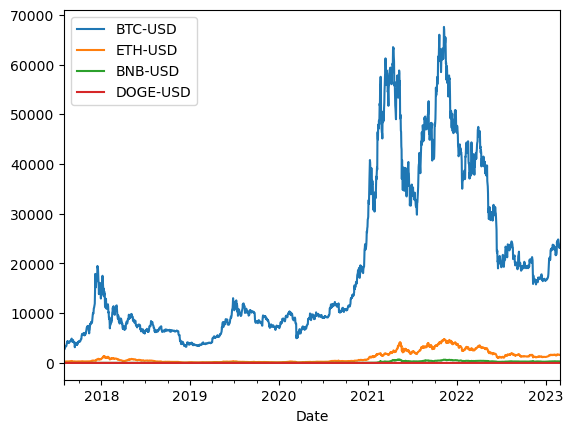

In [110]:
filteredprices.plot()
plt.show()

In [ ]:
To plot this Dataframe with several columns, we can use the keyword "subplots".

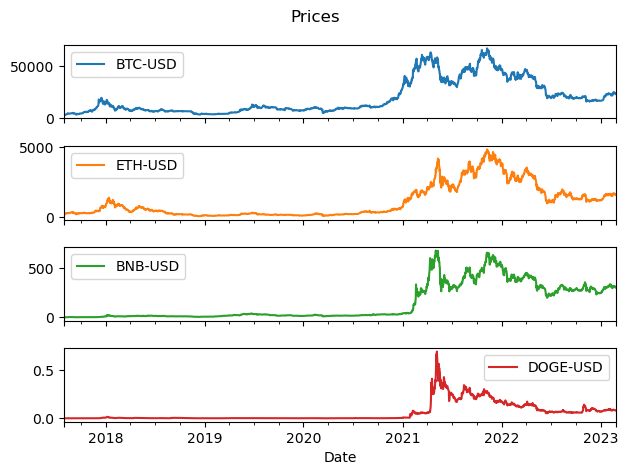

In [143]:
filteredprices.plot(subplots=True, title = 'Prices')
plt.tight_layout(); plt.show()

# Cryptocurrency prices over the last 5 years.

Text(0.5, 1.0, 'DOGE-USD')

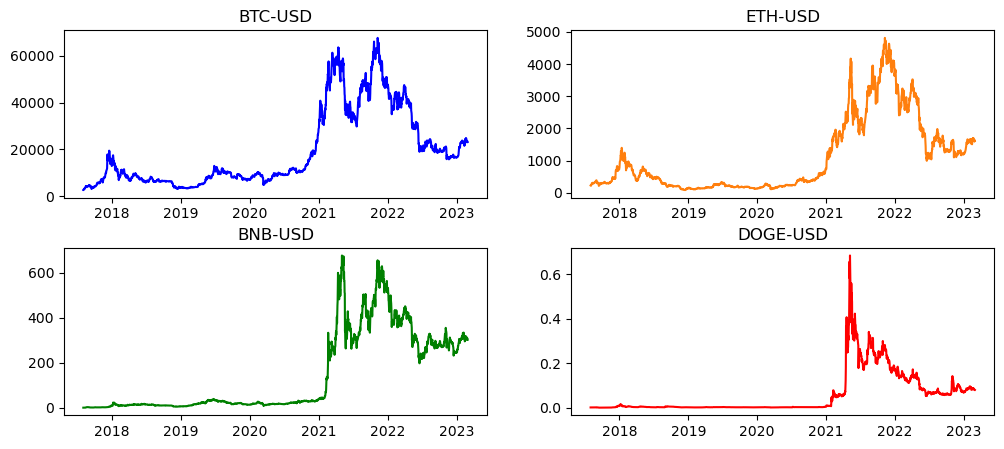

In [151]:
fig, axs = plt.subplots(2,2, figsize=(12,5), gridspec_kw={'hspace': 0.3, 'wspace': 0.2})

axs[0, 0].plot(filteredprices['BTC-USD'], c='b')
axs[0, 0].set_title('BTC-USD')
axs[0, 1].plot(filteredprices['ETH-USD'], c='tab:orange')
axs[0, 1].set_title('ETH-USD')
axs[1, 0].plot(filteredprices['BNB-USD'], c='g')
axs[1, 0].set_title('BNB-USD')
axs[1, 1].plot(filteredprices['DOGE-USD'], c='r')
axs[1, 1].set_title('DOGE-USD')


The cryptocurrencies have different scales then the first plot doesn't give us to much information about the behavior of the last 3 cryptocurrencies with the price that is less, compare with Bitcoin that is the most commmon and expensive cryptocurrency in the market at the moment. As this plot doesn't take the different scales into account, we will re-scale the prices to see better the different fluctuations of each cryptocurrency, all together in one graphic.

In [121]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled = min_max_scaler.fit_transform(filteredprices)
scaled

array([[1.17028205e-02, 3.01325358e+00, 0.00000000e+00, 1.51569020e-01],
       [0.00000000e+00, 2.86899983e+00, 9.32531867e-05, 1.50984263e-01],
       [1.45028630e-01, 2.98300682e+00, 9.96180868e-04, 1.52007588e-01],
       ...,
       [3.21488969e+01, 3.29226402e+01, 4.57236849e+01, 1.19063547e+01],
       [3.20897814e+01, 3.27853665e+01, 4.51108783e+01, 1.17820938e+01],
       [3.15107771e+01, 3.21840272e+01, 4.46090873e+01, 1.16943803e+01]])

In [125]:
#Convert into a dataframe
scaled_df = pd.DataFrame(scaled,columns = filteredprices.columns)
scaled_df

,BTC-USD,ETH-USD,BNB-USD,DOGE-USD
0,0.011703,3.013254,0.000000,0.151569
1,0.000000,2.869000,0.000093,0.150984
2,0.145029,2.983007,0.000996,0.152008
3,0.285586,2.934993,0.001129,0.155662
4,0.836066,3.642301,0.004297,0.194695
...,...,...,...,...
2033,31.589073,32.236272,44.694939,11.716309
2034,31.553996,31.951571,44.743786,11.700228
2035,32.148897,32.922640,45.723685,11.906355
2036,32.089781,32.785366,45.110878,11.782094


We use the MinMaxScaler class from the preprocessing module of scikit-learn to scale the values of the dataset to a specified range.

preprocessing.MinMaxScaler() creates a new MinMaxScaler object that will be used to scale the data.

feature_range=(0,100) sets the range to which the data will be scaled. In this case, it will be scaled to the range of 0 to 100.

min_max_scaler.fit_transform(filteredprices) applies the scaling to the filteredprices dataset. The fit_transform() method fits the scaler to the data and then transforms it.

The scaled data is stored in the scaled variable.

# Plot scaled_df

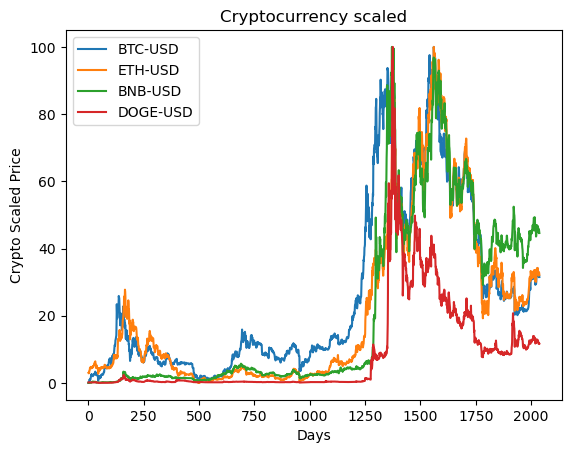

In [129]:
scaled_df.plot(title = "Cryptocurrency scaled", xlabel = "Days", ylabel= "Crypto Scaled Price")
plt.show()

We can see, the cryptocurrencies have a correlation, when the prices drops in one cryptocurrency the others prices in the other cryptocurrencies drops as well and when the prices rises the other prices from the other cryptocurrencies rises as well.

# Statistics

In [137]:
filteredprices.describe()

,BTC-USD,ETH-USD,BNB-USD,DOGE-USD
count,2038.000000,2038.000000,2038.000000,2038.000000
mean,19399.342586,1101.130343,144.123503,0.058530
std,16495.584187,1157.397985,180.425254,0.095397
min,2710.670000,84.310000,0.099870,0.000755
25%,7344.145000,220.085000,13.260000,0.002519
50%,10799.315000,476.015000,23.985000,0.003642
75%,29775.407500,1659.322500,293.872500,0.080780
max,67566.830000,4812.090000,675.680000,0.684800


All of this statistics come from August '2017' until the end of February '2023'. The min price of Bitcoin is 2710.67 and the max is 67,566.83. We can see that between this 6 years the price increase 96% from the min value. The most popular and expensive coin is Bitcoin. With a mean of 19,399.34 and standard deviation of 16495.58. ...........................more analysis

# For compare cryptocurrencies we will work with daily returns instead of closing prices. (Relative price changes).

In [115]:
daily_returns = filteredprices.pct_change().dropna(axis=0)

In [116]:
daily_returns

,BTC-USD,ETH-USD,BNB-USD,DOGE-USD
Date,,,,
2017-08-02,-0.002792,-0.030075,0.006308,-0.002232
2017-08-03,0.034700,0.024506,0.060697,0.003915
2017-08-04,0.032502,-0.010074,0.008443,0.013928
2017-08-05,0.123285,0.149908,0.199070,0.146703
2017-08-06,-0.011980,0.019726,0.016292,-0.085290
...,...,...,...,...
2023-02-24,-0.031292,-0.025862,-0.021003,-0.040218
2023-02-25,-0.000981,-0.008369,0.001093,-0.001360
2023-02-26,0.016648,0.028785,0.021893,0.017453


pct_change() is a method in pandas library, that calculates the percentage change between the current element and its preceding element, and returns a new DataFrame with the computed values. And we are using dropna() function to clean the data from non_numerical values.

# To get the price changes over time we have to accumulate the returns to compare the cryptocurrencies

In [118]:
daily_cum_returns = (daily_returns + 1).cumprod()-1

In [119]:
daily_cum_returns

,BTC-USD,ETH-USD,BNB-USD,DOGE-USD
Date,,,,
2017-08-02,-0.002792,-0.030075,0.006308,-0.002232
2017-08-03,0.031811,-0.006306,0.067388,0.001674
2017-08-04,0.065347,-0.016316,0.076399,0.015625
2017-08-05,0.196688,0.131146,0.290678,0.164621
2017-08-06,0.182352,0.153459,0.311705,0.065290
...,...,...,...,...
2023-02-24,7.534184,6.092517,3023.431761,44.145089
2023-02-25,7.525814,6.033161,3026.736057,44.083705
2023-02-26,7.667754,6.235613,3093.022229,44.870536


# Now with this data we can compare the cryptocurrencies

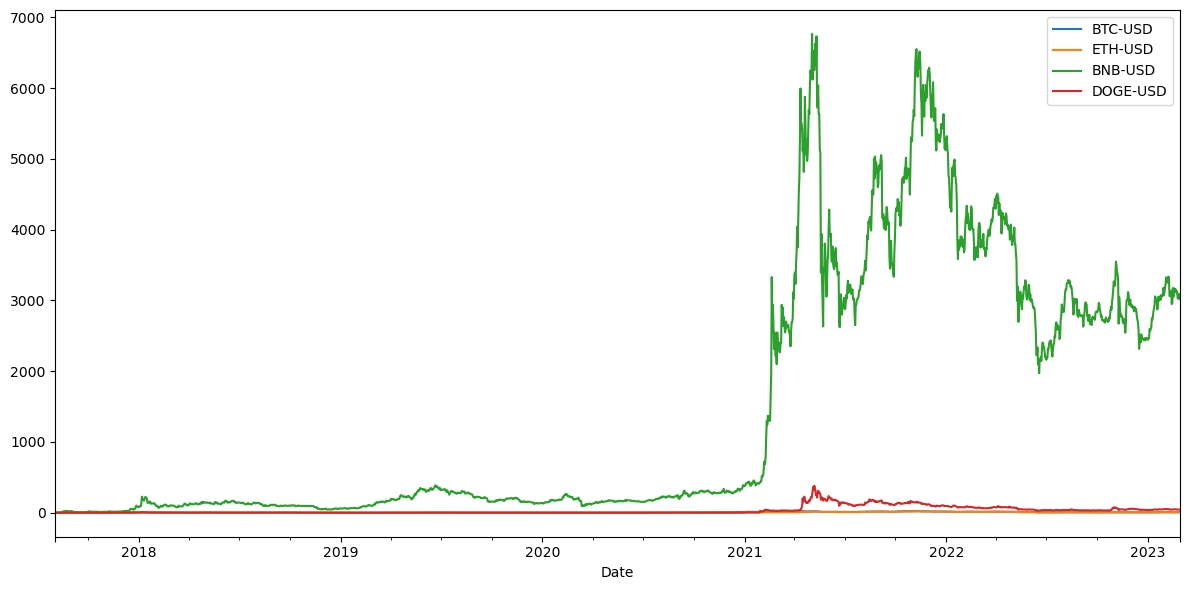

In [146]:
daily_cum_returns.plot(figsize=(12,6))
plt.tight_layout(); plt.show()

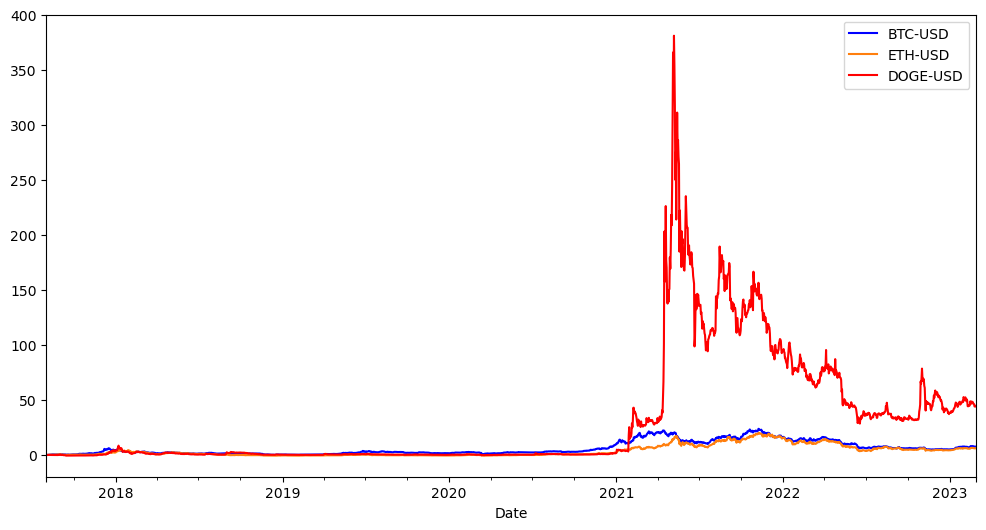

In [149]:
colors = ['b','tab:orange','r']
daily_cum_returns[['BTC-USD','ETH-USD', 'DOGE-USD']].plot(color = colors, figsize= (12,6))
plt.show()